In [36]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns

In [37]:
data = pd.read_csv('dataset/medical_insurance.csv')
data.shape

(1338, 8)

In [38]:
data.head()

,age,gender,bmi,children,discount_eligibility,region,expenses,premium
0,19,female,27.9,0,yes,southwest,16884.92,168.8492
1,18,male,33.8,1,no,southeast,1725.55,17.2555
2,28,male,33.0,3,no,southeast,4449.46,44.4946
3,33,male,22.7,0,no,northwest,21984.47,439.6894
4,32,male,28.9,0,no,northwest,3866.86,77.3372


In [39]:
data.describe()

,age,bmi,children,expenses,premium
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414,262.874685
std,14.049960,6.098382,1.205493,12110.011240,292.532178
min,18.000000,16.000000,0.000000,1121.870000,11.218700
25%,27.000000,26.300000,0.000000,4740.287500,87.354250
50%,39.000000,30.400000,1.000000,9382.030000,174.997400
75%,51.000000,34.700000,2.000000,16639.915000,342.908900
max,64.000000,53.100000,5.000000,63770.430000,1983.106400


In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   age                   1338 non-null   int64  
 1   gender                1338 non-null   object 
 2   bmi                   1338 non-null   float64
 3   children              1338 non-null   int64  
 4   discount_eligibility  1338 non-null   object 
 5   region                1338 non-null   object 
 6   expenses              1338 non-null   float64
 7   premium               1338 non-null   float64
dtypes: float64(3), int64(2), object(3)
memory usage: 83.8+ KB


In [41]:
total_nulls = data.isnull().sum().sum()
print("Total nulls:", total_nulls)

Total nulls: 0


In [ ]:
def detect_outliers(df):
    result = {}
    numeric_columns = [col for col in df.columns if pd.api.types.is_numeric_dtype(df[col])]
    
    for col in numeric_columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        outlier_mask = (df[col] < lower_bound) | (df[col] > upper_bound)
        outlier_indices = df[outlier_mask].index.tolist()
        
        result[col] = {
            'outlier_indices': outlier_indices,
            'num_outliers': len(outlier_indices),
            'mean_outliers': df.loc[outlier_indices, col].mean() if len(outlier_indices) > 0 else None
        }
    
    return result


outlier_info = detect_outliers(data)

print("📊 Outlier Analysis Report\n" + "-"*40)

all_outlier_indices = []

for col, info in outlier_info.items():
    print(f"🧩 Column: {col}")
    print(f"   • Number of outliers: {info['num_outliers']}")
    print(f"   • Mean of outliers: {info['mean_outliers']:.2f}" if info['mean_outliers'] is not None else "   • Mean of outliers: None")
    print(f"   • Outlier indices: {info['outlier_indices']}")
    print("-"*40)
    all_outlier_indices.extend(info['outlier_indices'])

unique_outlier_indices = list(set(all_outlier_indices))
total_unique_outliers = len(unique_outlier_indices)

print("\n✅ Summary across all numeric columns:")
print(f"   • Total unique outlier indices: {total_unique_outliers}")
print(f"   • Unique outlier indices: {unique_outlier_indices}")


📊 Outlier Analysis Report
----------------------------------------
🧩 Column: age
   • Number of outliers: 0
   • Mean of outliers: None
   • Outlier indices: []
----------------------------------------
🧩 Column: bmi
   • Number of outliers: 9
   • Mean of outliers: 49.28
   • Outlier indices: [116, 286, 401, 543, 847, 860, 1047, 1088, 1317]
----------------------------------------
🧩 Column: children
   • Number of outliers: 0
   • Mean of outliers: None
   • Outlier indices: []
----------------------------------------
🧩 Column: expenses
   • Number of outliers: 139
   • Mean of outliers: 42103.95
   • Outlier indices: [14, 19, 23, 29, 30, 34, 38, 39, 49, 53, 55, 82, 84, 86, 94, 109, 123, 146, 158, 161, 175, 185, 203, 223, 240, 242, 251, 252, 254, 256, 263, 265, 271, 281, 288, 292, 298, 312, 314, 322, 327, 328, 330, 338, 373, 377, 381, 420, 421, 422, 441, 476, 488, 500, 524, 530, 543, 549, 558, 569, 577, 587, 609, 615, 621, 623, 629, 665, 667, 668, 674, 677, 682, 689, 697, 706, 725, 736

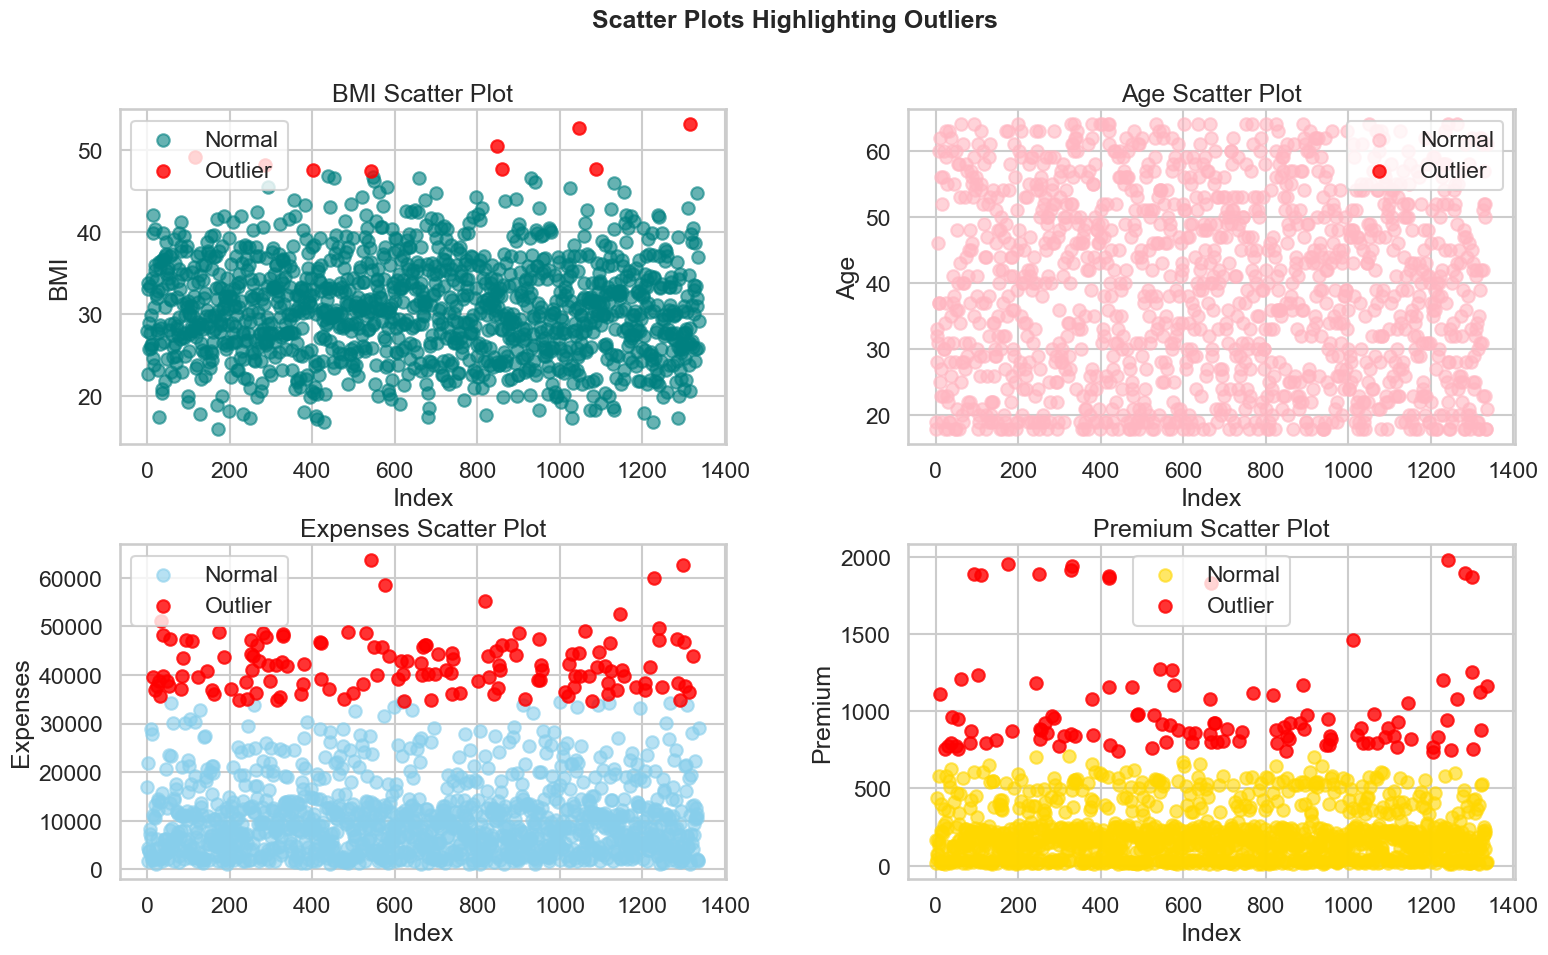

In [43]:
fig, axes = plt.subplots(2, 2, figsize=(18, 10))
fig.subplots_adjust(hspace=0.3, wspace=0.3)

plot_settings = [
    ('bmi', axes[0,0], 'teal', 'BMI Scatter Plot', 'BMI'),
    ('age', axes[0,1], 'lightpink', 'Age Scatter Plot', 'Age'),
    ('expenses', axes[1,0], 'skyblue', 'Expenses Scatter Plot', 'Expenses'),
    ('premium', axes[1,1], 'gold', 'Premium Scatter Plot', 'Premium'),
]

for col, ax, color, title, ylabel in plot_settings:
    outlier_idx = outlier_info[col]['outlier_indices']
    normal_idx = data.index.difference(outlier_idx)
    
    ax.scatter(normal_idx, data.loc[normal_idx, col], color=color, alpha=0.6, label='Normal')
    ax.scatter(outlier_idx, data.loc[outlier_idx, col], color='red', alpha=0.8, label='Outlier')
    
    ax.set_title(title)
    ax.set_xlabel('Index')
    ax.set_ylabel(ylabel)
    ax.legend()

plt.suptitle('Scatter Plots Highlighting Outliers', fontsize=18, weight='bold')
plt.show()

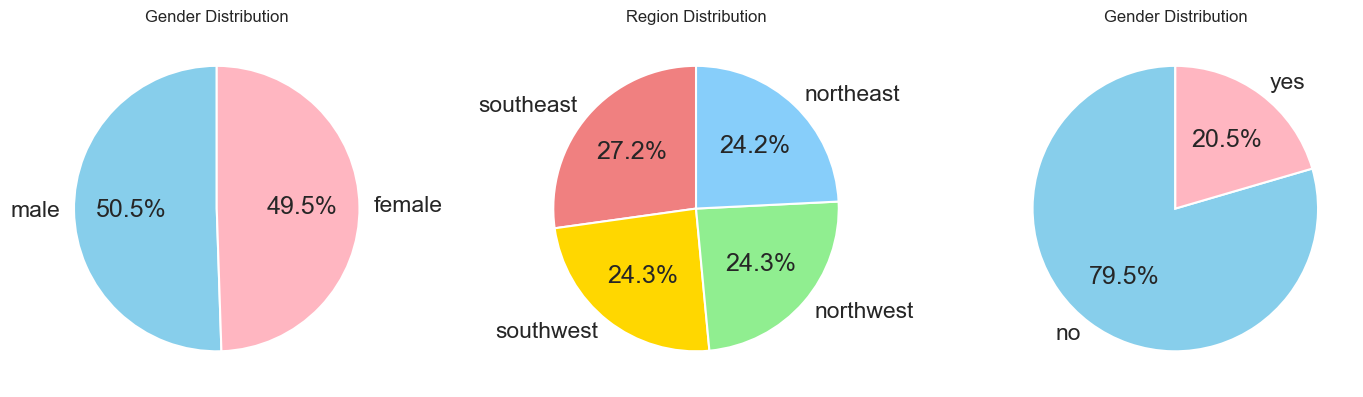

In [44]:
fig, axes = plt.subplots(1, 3, figsize=(14, 6))

gender_count = data['gender'].value_counts()
axes[0].pie(
    gender_count,
    labels=gender_count.index,
    autopct='%1.1f%%',
    colors=['skyblue', 'lightpink'],
    startangle=90
)
axes[0].set_title('Gender Distribution', fontsize=12)

region_count = data['region'].value_counts()
axes[1].pie(
    region_count,
    labels=region_count.index,
    autopct='%1.1f%%',
    colors=['lightcoral', 'gold', 'lightgreen', 'lightskyblue'],
    startangle=90
)
axes[1].set_title('Region Distribution', fontsize=12)

discount_count = data['discount_eligibility'].value_counts()
axes[2].pie(
    discount_count,
    labels=discount_count.index,
    autopct='%1.1f%%',
    colors=['skyblue', 'lightpink'],
    startangle=90
)
axes[2].set_title('Gender Distribution', fontsize=12)


plt.tight_layout()
plt.show()

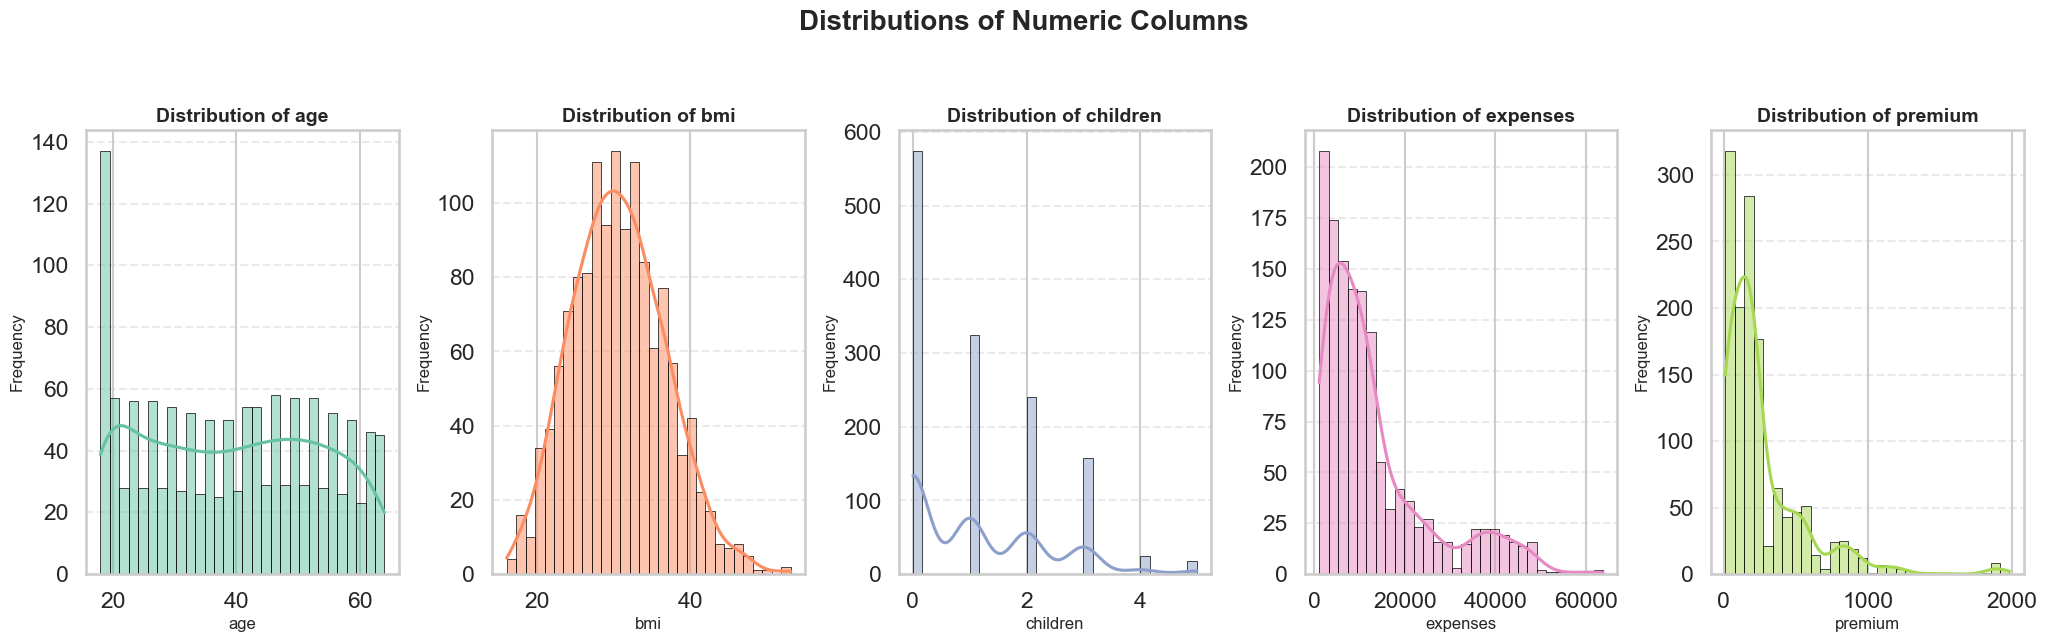

In [45]:
numeric_columns = [col for col in data.columns if pd.api.types.is_numeric_dtype(data[col])]

sns.set_style("whitegrid")
sns.set_context("talk")

n_rows, n_cols = 4, 5
fig, axes = plt.subplots(n_rows, n_cols, figsize=(25, 30))
fig.subplots_adjust(hspace=0.4, wspace=0.3)

colors = sns.color_palette("Set2", len(numeric_columns))

for i, column in enumerate(numeric_columns):
    row, col = divmod(i, n_cols)
    ax = axes[row, col]
    sns.histplot(
        data[column],
        kde=True,
        bins=30,
        color=colors[i],
        ax=ax,
        edgecolor='black',
        linewidth=0.5
    )
    ax.set_title(f"Distribution of {column}", fontsize=14, weight='bold')
    ax.set_xlabel(column, fontsize=12)
    ax.set_ylabel("Frequency", fontsize=12)
    ax.grid(axis='y', linestyle="--", alpha=0.4)

for j in range(len(numeric_columns), n_rows * n_cols):
    fig.delaxes(axes.flatten()[j])

fig.suptitle("Distributions of Numeric Columns", fontsize=20, weight='bold', y=0.92)

plt.show()

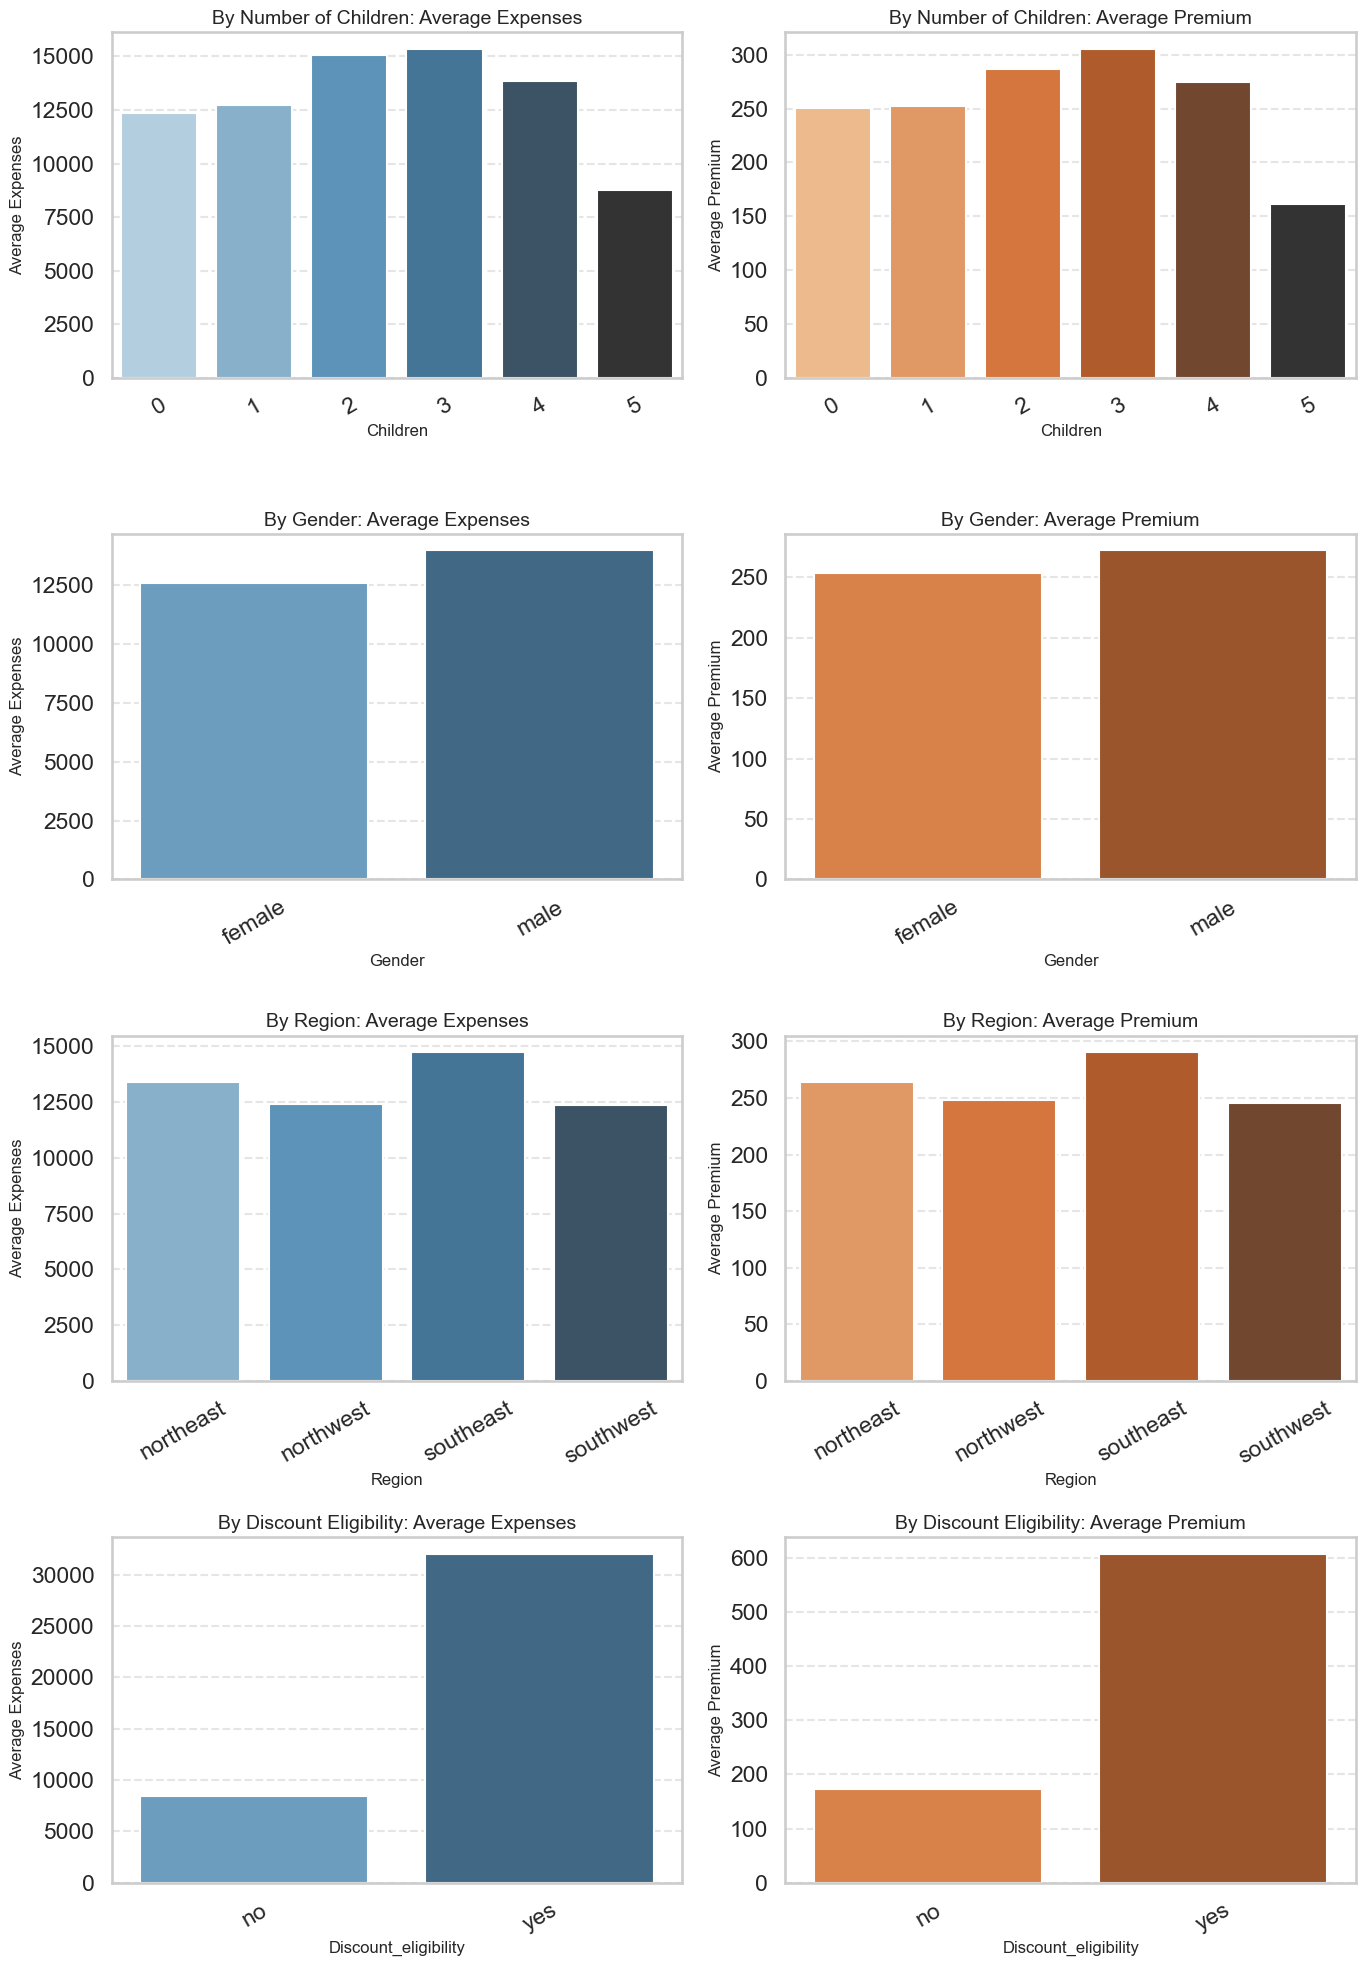

In [46]:
groups = [
    ('children', 'By Number of Children'),
    ('gender', 'By Gender'),
    ('region', 'By Region'),
    ('discount_eligibility', 'By Discount Eligibility')
]

fig, axes = plt.subplots(len(groups), 2, figsize=(14, 5 * len(groups)))

for row_idx, (group_col, title_prefix) in enumerate(groups):
    avg_data = data.groupby(group_col)[['expenses', 'premium']].mean().reset_index()
    
    # Expenses plot
    sns.barplot(
        data=avg_data, x=group_col, y='expenses', hue=group_col,
        ax=axes[row_idx, 0], palette='Blues_d', legend=False
    )
    axes[row_idx, 0].set_title(f'{title_prefix}: Average Expenses', fontsize=14)
    axes[row_idx, 0].set_xlabel(group_col.capitalize(), fontsize=12)
    axes[row_idx, 0].set_ylabel('Average Expenses', fontsize=12)
    axes[row_idx, 0].tick_params(axis='x', rotation=30)
    axes[row_idx, 0].grid(axis='y', linestyle='--', alpha=0.5)
    
    # Premium plot
    sns.barplot(
        data=avg_data, x=group_col, y='premium', hue=group_col,
        ax=axes[row_idx, 1], palette='Oranges_d', legend=False
    )
    axes[row_idx, 1].set_title(f'{title_prefix}: Average Premium', fontsize=14)
    axes[row_idx, 1].set_xlabel(group_col.capitalize(), fontsize=12)
    axes[row_idx, 1].set_ylabel('Average Premium', fontsize=12)
    axes[row_idx, 1].tick_params(axis='x', rotation=30)
    axes[row_idx, 1].grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

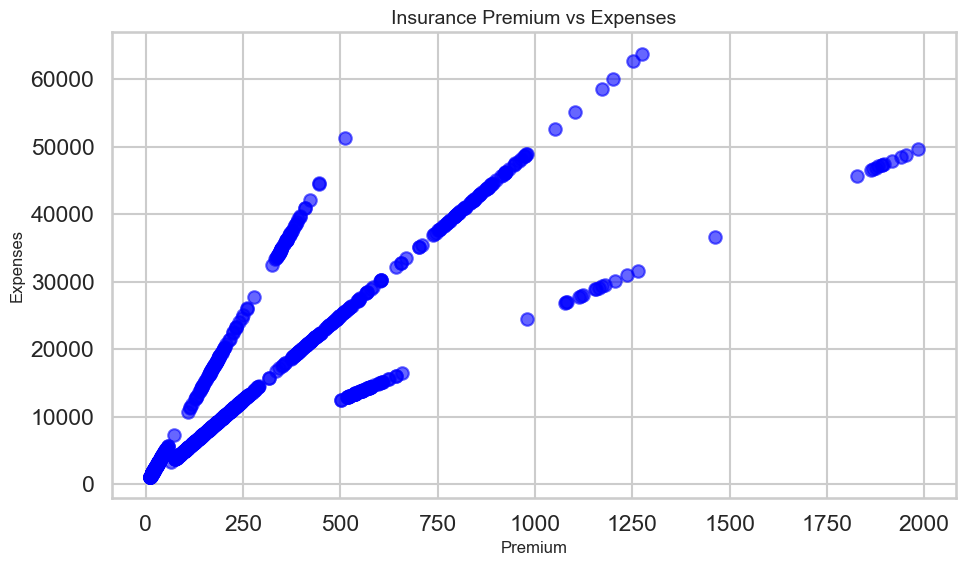

In [47]:
plt.figure(figsize=(10, 6))
plt.scatter(data['premium'], data['expenses'], color='blue', alpha=0.6)

plt.title('Insurance Premium vs Expenses', fontsize=14)
plt.xlabel('Premium', fontsize=12)
plt.ylabel('Expenses', fontsize=12)

plt.grid(True)
plt.tight_layout()
plt.show()

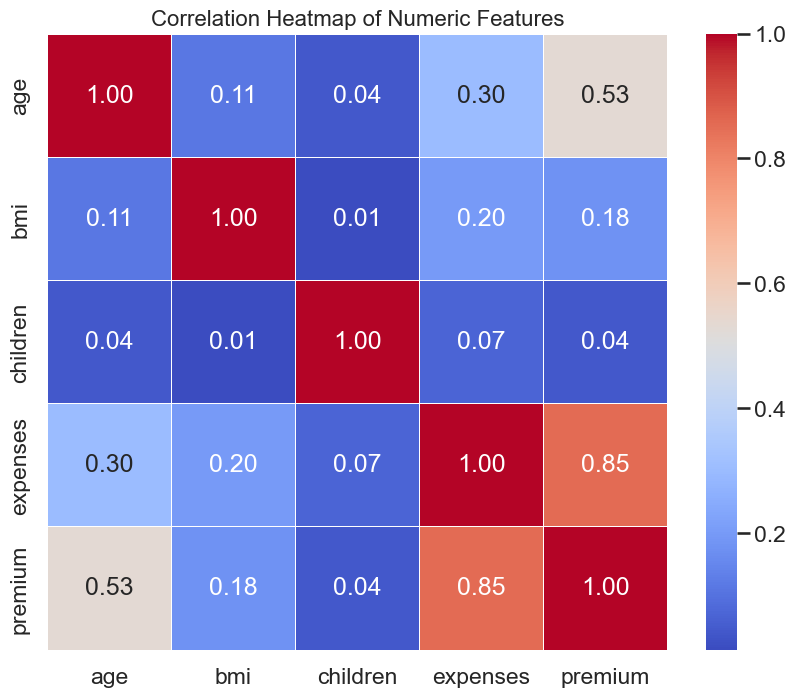

In [48]:
numeric_columns = [col for col in data.columns if pd.api.types.is_numeric_dtype(data[col])]

corr_matrix = data[numeric_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Numeric Features', fontsize=16)
plt.show()

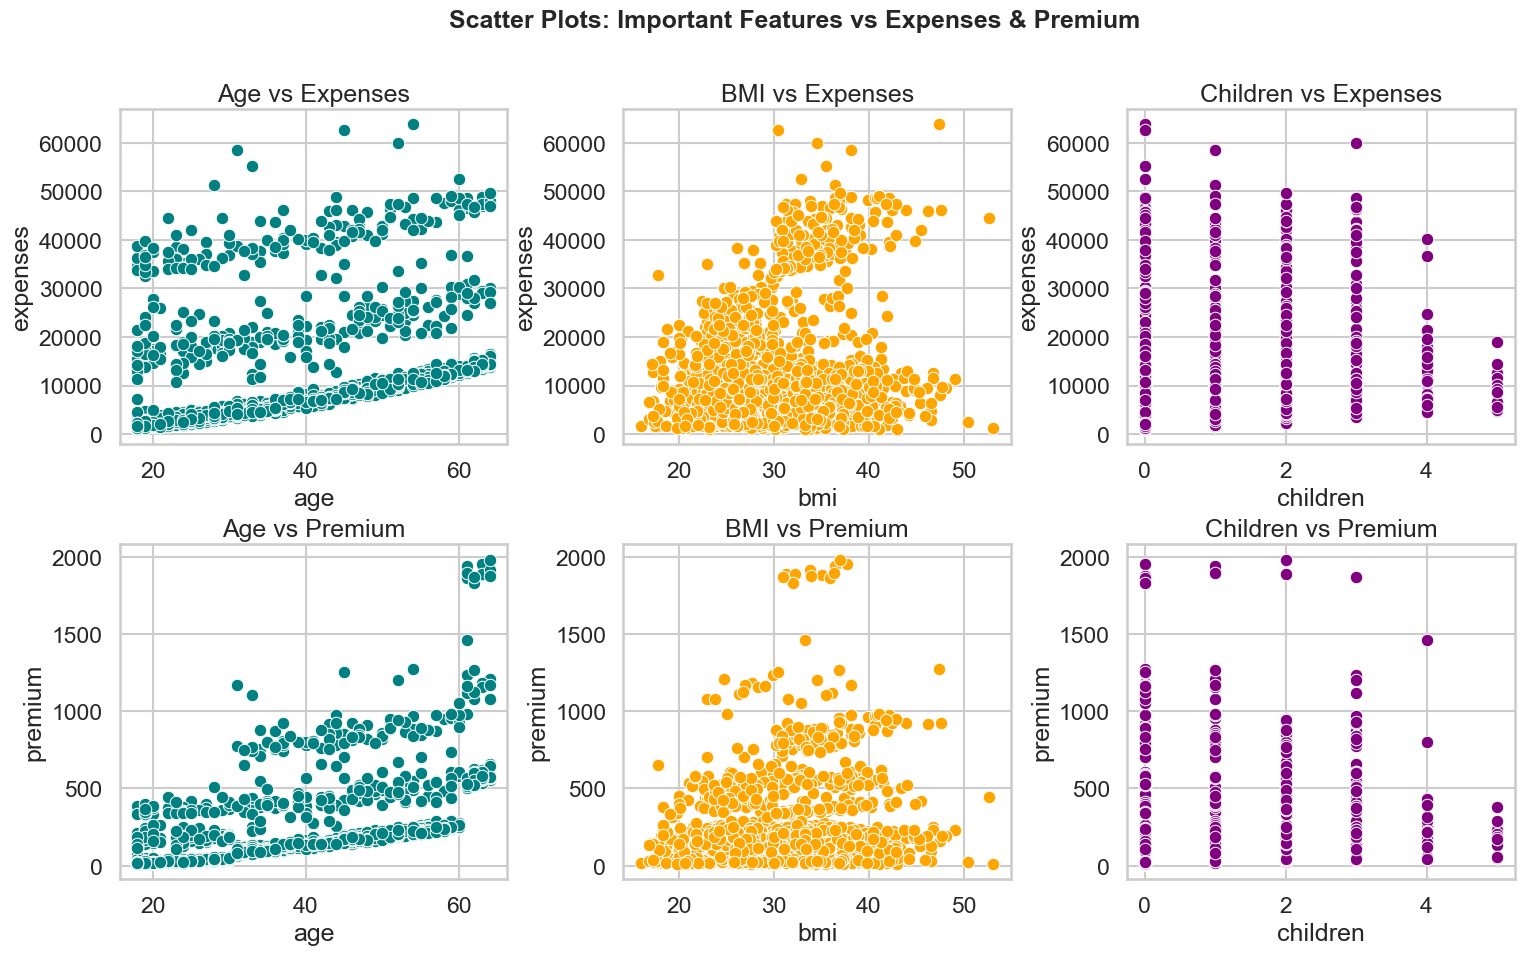

In [49]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.subplots_adjust(hspace=0.3, wspace=0.3)

# scatter age vs expenses
sns.scatterplot(x='age', y='expenses', data=data, ax=axes[0, 0], color='teal')
axes[0, 0].set_title('Age vs Expenses')

# scatter bmi vs expenses
sns.scatterplot(x='bmi', y='expenses', data=data, ax=axes[0, 1], color='orange')
axes[0, 1].set_title('BMI vs Expenses')

# scatter children vs expenses
sns.scatterplot(x='children', y='expenses', data=data, ax=axes[0, 2], color='purple')
axes[0, 2].set_title('Children vs Expenses')

# scatter age vs premium
sns.scatterplot(x='age', y='premium', data=data, ax=axes[1, 0], color='teal')
axes[1, 0].set_title('Age vs Premium')

# scatter bmi vs premium
sns.scatterplot(x='bmi', y='premium', data=data, ax=axes[1, 1], color='orange')
axes[1, 1].set_title('BMI vs Premium')

# scatter children vs premium
sns.scatterplot(x='children', y='premium', data=data, ax=axes[1, 2], color='purple')
axes[1, 2].set_title('Children vs Premium')

plt.suptitle('Scatter Plots: Important Features vs Expenses & Premium', fontsize=18, weight='bold')
plt.show()

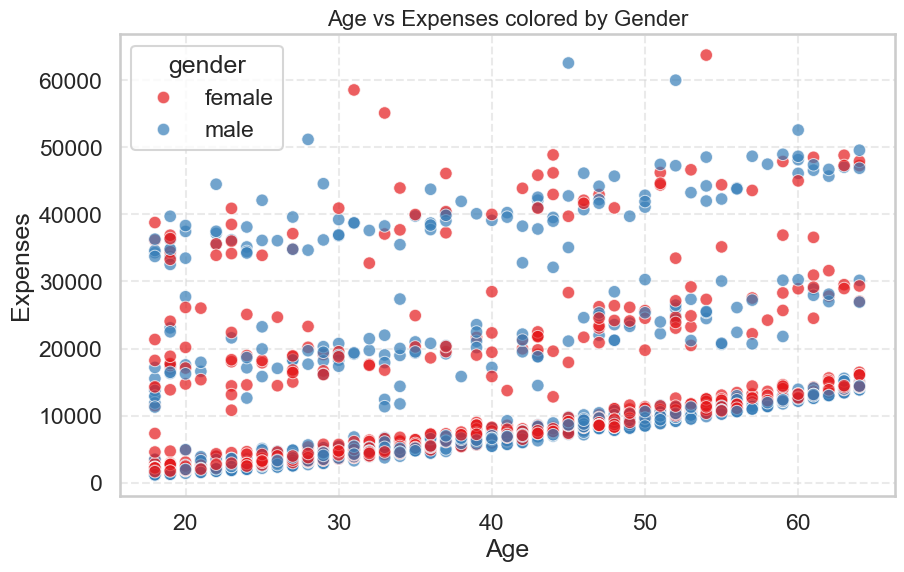

In [50]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='age',
    y='expenses',
    hue='gender',
    data=data,
    palette='Set1',
    alpha=0.7
)
plt.title('Age vs Expenses colored by Gender', fontsize=16)
plt.xlabel('Age')
plt.ylabel('Expenses')
plt.grid(True, linestyle='--', alpha=0.4)
plt.show()

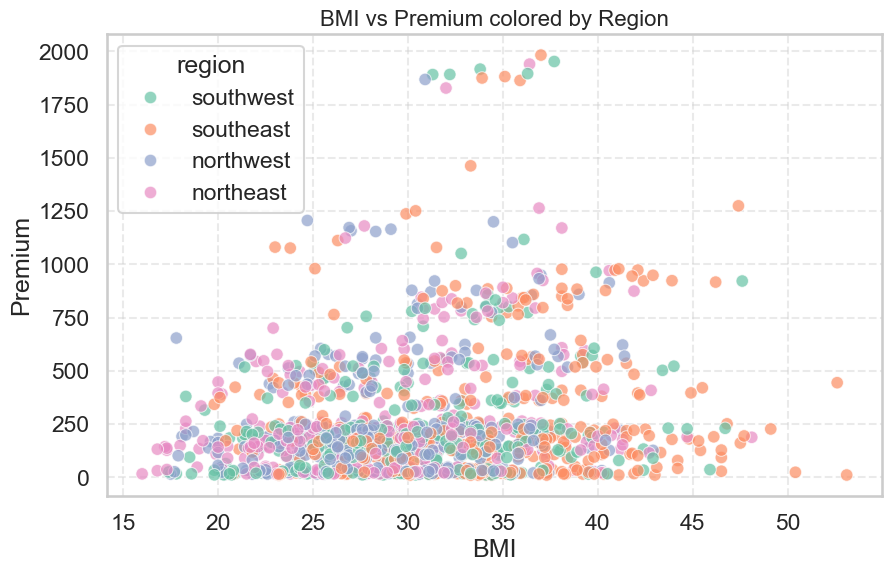

In [51]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='bmi',
    y='premium',
    hue='region',
    data=data,
    palette='Set2',
    alpha=0.7
)
plt.title('BMI vs Premium colored by Region', fontsize=16)
plt.xlabel('BMI')
plt.ylabel('Premium')
plt.grid(True, linestyle='--', alpha=0.4)
plt.show()

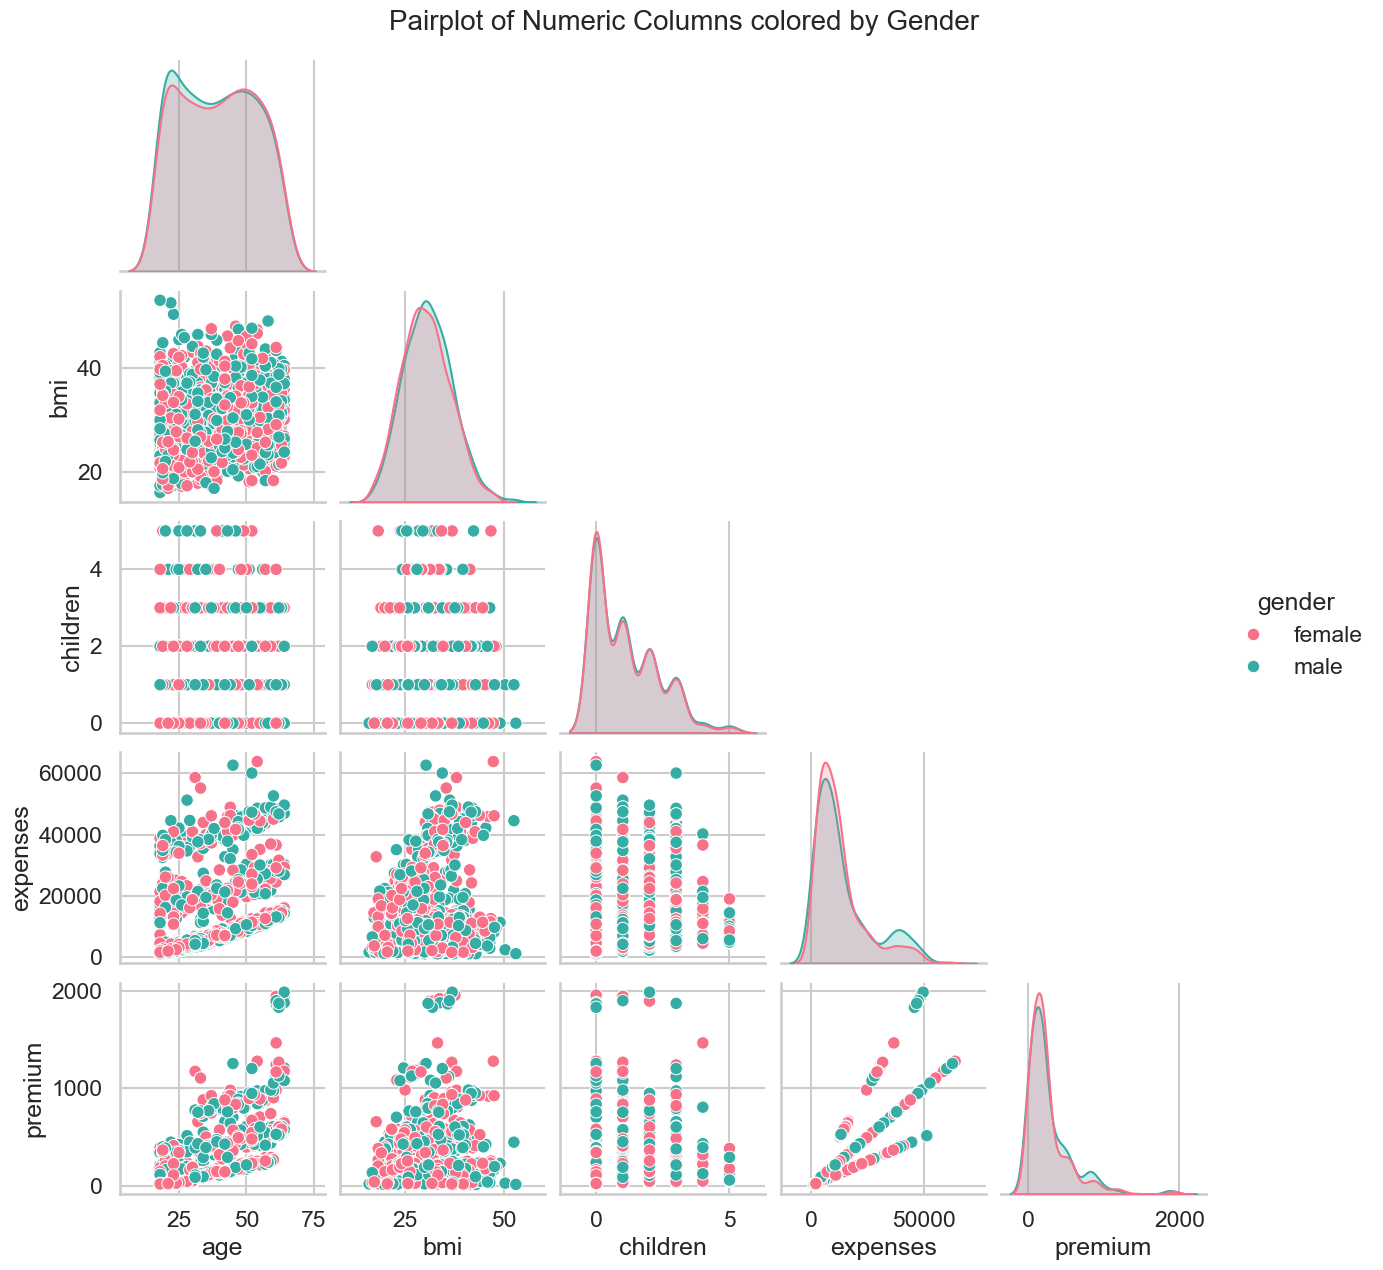

In [52]:
selected_columns = ['age', 'bmi', 'children', 'expenses', 'premium', 'gender']

sns.pairplot(
    data[selected_columns],
    hue='gender',
    palette='husl',
    diag_kind='kde',
    corner=True
)
plt.suptitle('Pairplot of Numeric Columns colored by Gender', fontsize=20, y=1.02)
plt.show()

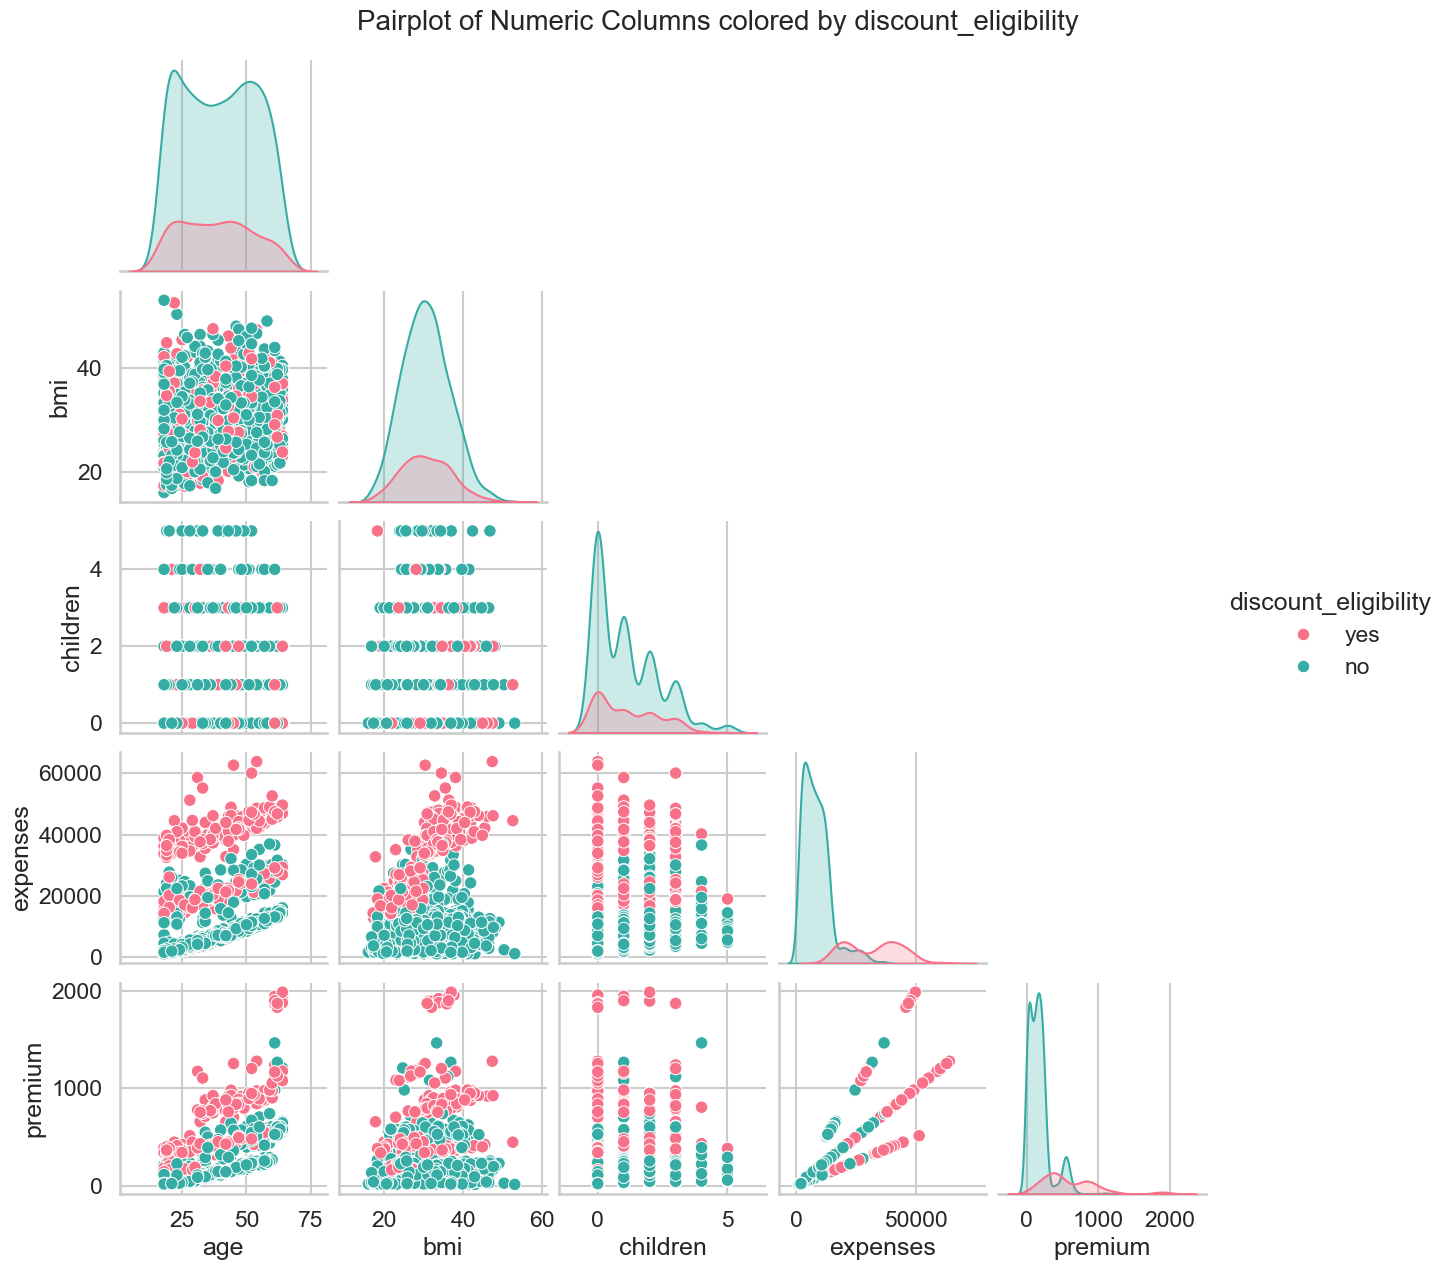

In [53]:
selected_columns = ['age', 'bmi', 'children', 'expenses', 'premium', 'discount_eligibility']

sns.pairplot(
    data[selected_columns],
    hue='discount_eligibility',
    palette='husl',
    diag_kind='kde',
    corner=True
)
plt.suptitle('Pairplot of Numeric Columns colored by discount_eligibility', fontsize=20, y=1.02)
plt.show()

## 📊 Insurance Dataset Analysis

This report presents a thorough analysis of an insurance dataset, integrating various visualizations and outlier detection to uncover key drivers of expenses and premiums. The insights derived are crucial for understanding customer segmentation, pricing strategies, and potential areas for further investigation.

---

### 1. Data Distribution and Feature Overview

#### 1.1 Distributions of Numeric Columns

*(Chart: Distributions of Numeric Columns)*

* **Age:** Relatively uniform distribution across adults (18–65), suggesting balanced age representation.
* **BMI:** Approximately normal distribution centered around 30, with a notable portion of overweight or obese individuals.
* **Children:** Highly right-skewed; most have 0–1 child.
* **Expenses & Premium:** Both are heavily right-skewed, with long tails indicating a small group with very high costs.

#### 1.2 Categorical Feature Distributions

*(Chart: Gender, Region, Discount Eligibility)*

* **Gender:** Nearly even split (≈50.5% males, 49.5% females).
* **Region:** Fairly balanced across Southeast, Northeast, Southwest, and Northwest.
* **Discount Eligibility:** 79.5% not eligible, 20.5% eligible – as later analysis shows, this variable holds strong predictive power.

---

### 2. Feature Relationships and Correlations

#### 2.1 Correlation Heatmap

* **Premium & Expenses (0.85):** Very strong positive correlation.
* **Age & Premium (0.53):** Moderate positive correlation.
* **Age & Expenses (0.30):** Weak positive correlation.
* **BMI correlations:** Weak, but slightly positive.
* **Children:** Negligible impact.

#### 2.2 Scatter Plots: Important Features vs Expenses & Premium

* Age shows upward trends; clear cost bands suggest other influencing factors.
* BMI has a mild upward trend; wide scatter shows it’s not the sole driver.
* Number of children: minimal impact.

#### 2.3 Insurance Premium vs Expenses

* Distinct diagonal bands; strongest direct relationship; likely reflects pricing tiers.

#### 2.4 Age vs Expenses Colored by Gender

* Both genders show increasing expenses with age; males slightly higher.

#### 2.5 BMI vs Premium Colored by Region

* Southeast region stands out with higher premiums for similar BMI ranges.

#### 2.6 Pairplot by Gender

* Confirms small gender differences; males sometimes higher in expenses and premium.

#### 2.7 Average Expenses & Premium by Categorical Features

* **By Number of Children:** Flat trend; confirms minimal impact.
* **By Gender:** Males slightly higher.
* **By Region:** Southeast region highest.
* **By Discount Eligibility:** “Yes” group dramatically higher expenses and premiums.

#### 2.8 Pairplot by Discount Eligibility

* Distinct clustering: "yes" group concentrated at high expenses and premiums; confirms discount\_eligibility as strongest cost driver.

---

### 3. Outlier Analysis

*(Chart: Scatter Plots Highlighting Outliers)*

| Column   | Number of Outliers | Mean of Outliers |
| -------- | ------------------ | ---------------: |
| Age      | 0                  |             None |
| BMI      | 9                  |            49.28 |
| Children | 0                  |             None |
| Expenses | 139                |         42103.95 |
| Premium  | 113                |          1021.56 |

✅ **Total unique outlier indices:** 160

**Observations:**

* Expenses and premium outliers heavily overlap with the “discount\_eligible = yes” group, suggesting systemic high-cost cases rather than random noise.
* BMI outliers: very high BMI individuals, potential health impact.

---

### 🎯 **Conclusion & Strategic Implications**

* **Discount Eligibility:** Acts as a flag for high-cost cases; essential for segmentation and predictive modeling.
* **Strong Expense–Premium Link:** Premium directly tracks expenses.
* **Age & BMI:** Both positively influence costs.
* **Region:** Southeast region has higher costs.
* **Gender:** Small effect; males slightly costlier.
* **Children:** Minimal impact.
* **Outliers:** Not random, mostly from the discount-eligible high-cost segment.

---

*This analysis uncovers clear drivers of costs, highlights the critical role of discount\_eligibility, and provides a foundation for robust modeling and business decisions.*
